# Mammographic Mass

## Content


Mammography is the most effective method for breast cancer screening 
available today. However, the low positive predictive value of breast 
biopsy resulting from mammogram interpretation leads to approximately 
70% unnecessary biopsies with benign outcomes. This data set can be used to predict the severity (benign or malignant) 
of a mammographic mass lesion.

Dataset can be found at https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

## Attributes

Number of attributes: 6

Target Column: *Severity (0,1)*

All columns will be used

There are some missing data

1. BI-RADS assessment: 1 to 5 (numeric)

2. Age: patient's age in years (numeric) 

3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (numeric) 

4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (numeric) 

5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (numeric) 

6. Severity: benign=0 or malignant=1 (numeric) 



In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import sklearn
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
#import tensorflow.keras as keras
tf.keras.datasets
print("Python version is "+sys.version)
print("Matplotlib version is "+matplotlib.__version__)
print("Scikit-Learn version is "+sklearn.__version__)
print("Numpy version is "+np.__version__)
print("Pandas version is "+pd.__version__)

Python version is 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Matplotlib version is 3.0.3
Scikit-Learn version is 0.20.3
Numpy version is 1.16.2
Pandas version is 0.24.2


In [6]:
def display_history(history):
    lost_history = history.history['loss']
    plt.yscale('log')
    plt.plot(range(1,len(lost_history) + 1), lost_history)
    plt.xlabel('Epoch')
    plt.ylabel('Training Cost')
    plt.show()

In [5]:
import pandas as pd

df = pd.read_csv('mammograph.csv')

df.head(7)

,BI_RADS,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
5,4,65,1,?,3,0
6,4,70,?,?,3,0


In [5]:
df.shape

(961, 6)

In [6]:
df = df[(df != '?').all(axis=1)]
df.head(7)

,BI_RADS,age,shape,margin,density,severity
0,5,67,3,5,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
8,5,57,1,5,3,1
10,5,76,1,4,3,1
11,3,42,2,1,3,1
13,4,36,3,1,2,0


In [20]:
from sklearn.preprocessing import LabelEncoder

data = df.values
X = data[:,:-1]  
y = data[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array([0, 1], dtype=object)

# Training Data

In [1]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

NameError: name 'X' is not defined

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X_train, y_train)
#y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.789


# K CrossFold

In [23]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [307 289], Acc: 0.824
Fold:  2, Class dist.: [307 289], Acc: 0.868
Fold:  3, Class dist.: [308 290], Acc: 0.727
Fold:  4, Class dist.: [308 290], Acc: 0.833
Fold:  5, Class dist.: [308 290], Acc: 0.924
Fold:  6, Class dist.: [308 290], Acc: 0.803
Fold:  7, Class dist.: [308 290], Acc: 0.833
Fold:  8, Class dist.: [308 290], Acc: 0.894
Fold:  9, Class dist.: [308 290], Acc: 0.833
Fold: 10, Class dist.: [308 290], Acc: 0.818

CV accuracy: 0.836 +/- 0.051


In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.82352941 0.86764706 0.72727273 0.83333333 0.92424242 0.8030303
 0.83333333 0.89393939 0.83333333 0.81818182]
CV accuracy: 0.836 +/- 0.051


# Underfitting with Learning Curve

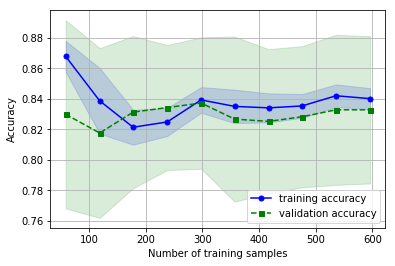

In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', max_iter=5000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               scoring='accuracy',
                               n_jobs=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

# Grid Search

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.807


In [31]:
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC 

# Testing Using Neural Network, Logistic, SVM

In [36]:
pipe_mlp = make_pipeline(StandardScaler(),
        PCA(n_components=5), 
        MLPClassifier(random_state=1, solver='lbfgs', hidden_layer_sizes=(10,)))

pipe_mlp.fit(X_train, y_train)
#y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_mlp.score(X_test, y_test))

Test Accuracy: 0.795


In [41]:
pipe_svc = make_pipeline(StandardScaler(),
        PCA(n_components=5), 
        SVC(random_state=1, C=1., gamma='auto'))

pipe_svc.fit(X_train, y_train)
#y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_svc.score(X_test, y_test))

Test Accuracy: 0.807


In [42]:
logistic_model = LogisticRegression(solver='lbfgs', multi_class='auto', tol=1e-10, max_iter = 40000, C=1)

In [44]:
logistic_model.fit(X_train, y_train)
print("Training set score: %f" % logistic_model.score(X_train, y_train))
print("Testing set score: %f" % logistic_model.score(X_test, y_test))

Training set score: 0.840361
Testing set score: 0.795181


In [62]:
mlp = MLPClassifier(hidden_layer_sizes=(10,9), alpha=1e-8,
                    solver='sgd', verbose=False, tol=1e-10, random_state=1,
                    learning_rate_init=.01, warm_start=True)

In [63]:
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Testing set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.515060
Testing set score: 0.512048


In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

k = 5
random_state = 1

In [51]:
kfold = KFold(n_splits=k, shuffle=True, random_state=random_state)

In [58]:
model = SVC(C=10, kernel='linear', tol=0.001, random_state=None)

In [59]:
scores = cross_validate(model, X, y, cv=kfold, scoring='accuracy', return_train_score=True)
print("Average training score: %f" % np.mean(scores['train_score']))
print("Testing set score: %f" % np.mean(scores['test_score']))

Average training score: 0.832831
Testing set score: 0.836145
